In [42]:
cmap_name = 'jet'

loaded 1 existing images from dataset
loaded 1 existing weights from weights-minTrue-r20v2


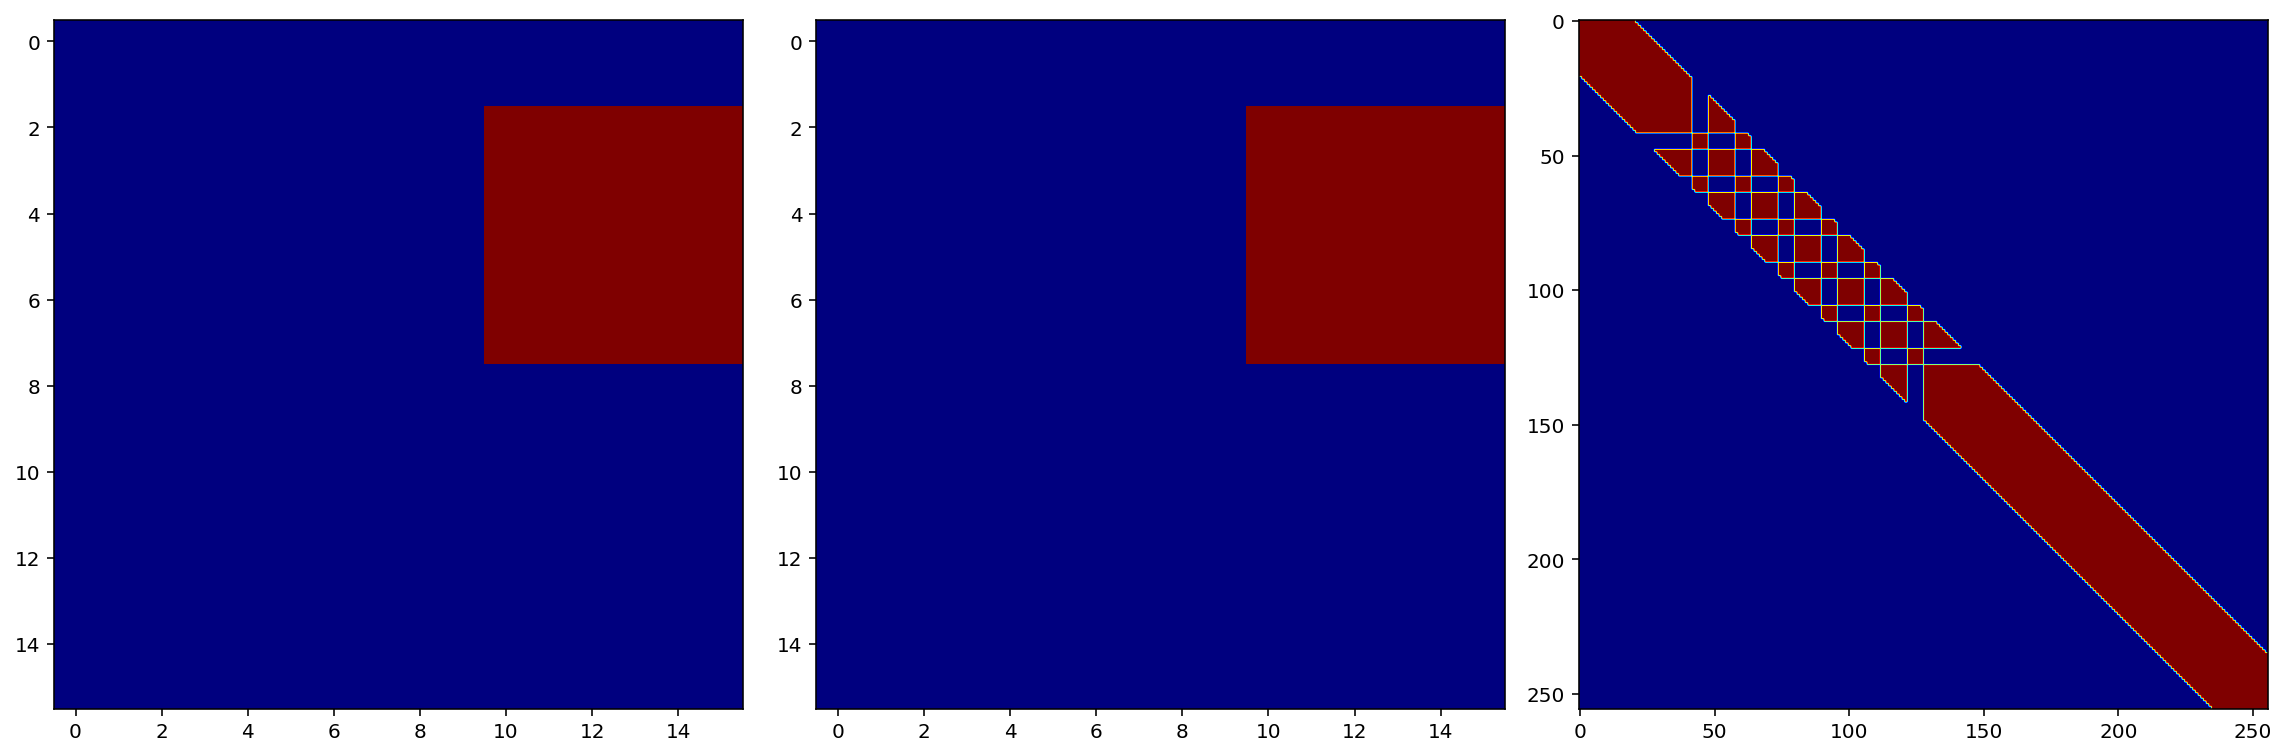

In [43]:
# THE DATA PORTION
# load a sample, see how it looks

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from net_argparser import net_argparser
from data import *

args = net_argparser(ipynb=True)
args.network = 1
args.total_images = 1
args.minify = True
args.radius = 20
args.img_size = [16,16] # the default is 32,32 anyway

train_dataset = SimpleDatasets(args, transform=transforms.ToTensor())
row = [train_dataset.get_image(0), train_dataset.get_segmentation(0), de_minW(train_dataset.get_weights(0))]

plot_multiple_images(0, row, figsize=args.img_size, ipynb=True, cmap_name=cmap_name)

f shape: torch.Size([1, 1])
min: 0.004625419481057639, max: 0.004625419481057639, avg: 0.004625419481057639


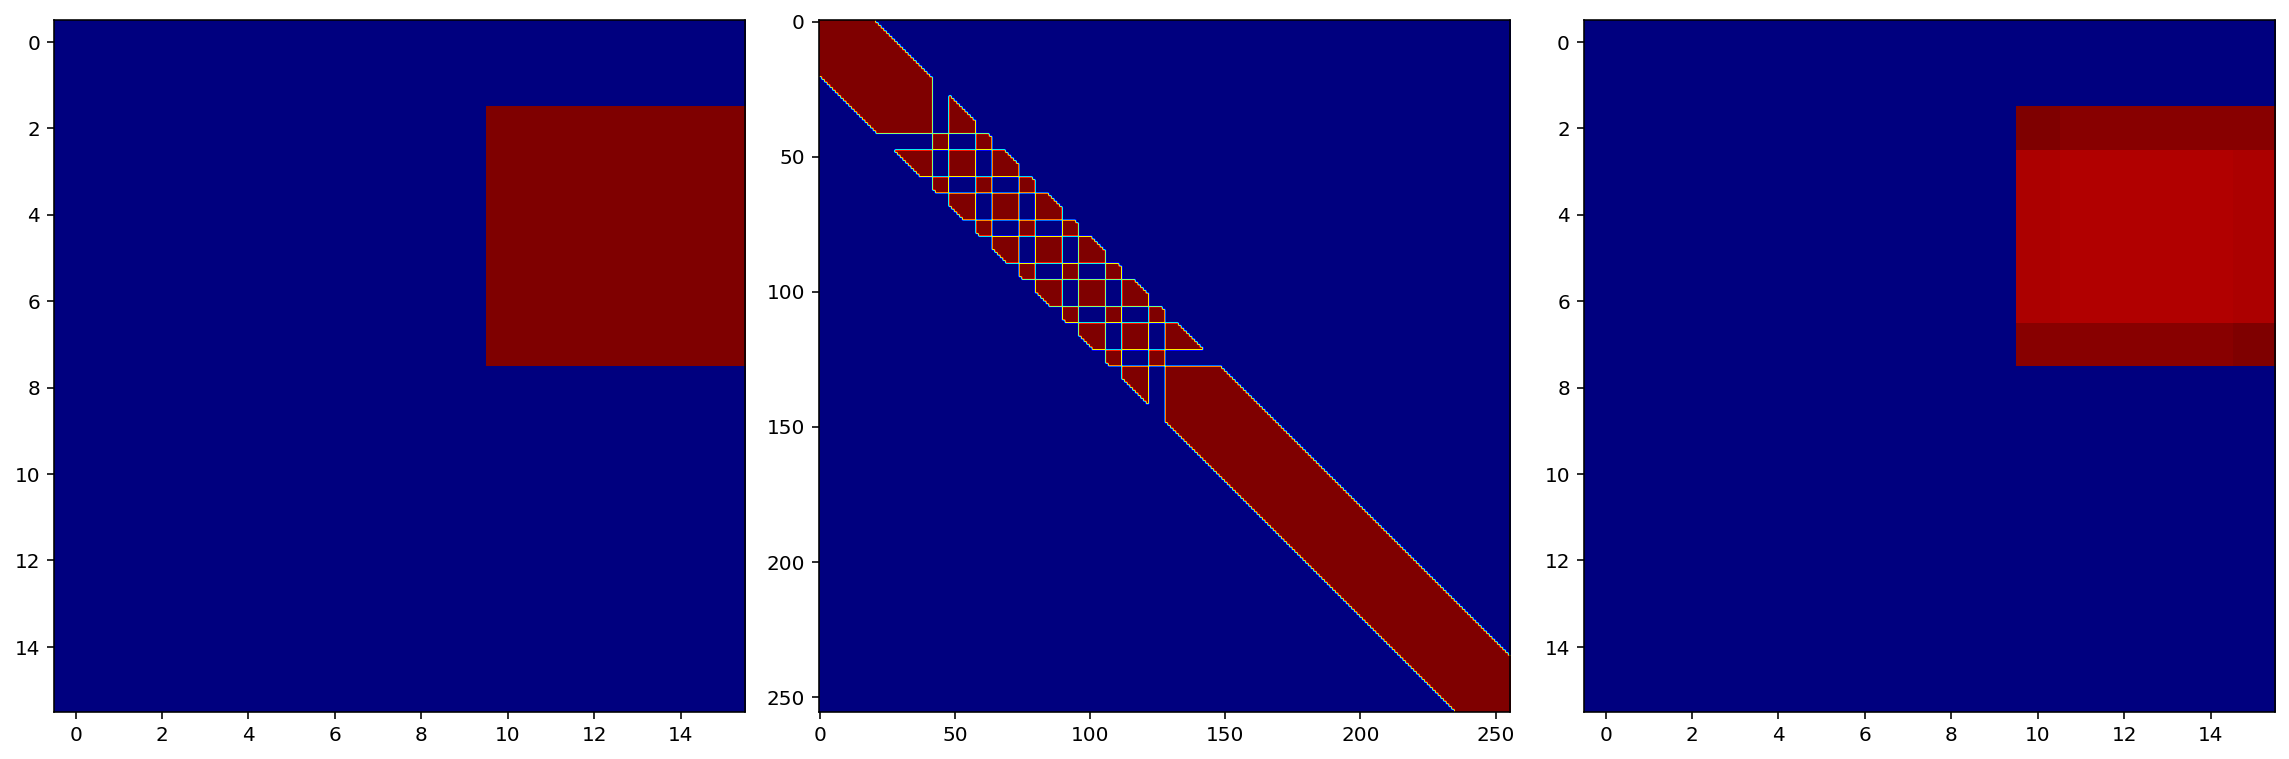

In [44]:
import torch
from torch.autograd import grad
from torch.autograd import gradcheck

import numpy as np

from nc import NormalizedCuts
from node import DeclarativeLayer


node = NormalizedCuts()
DL = DeclarativeLayer(node)

W = row[2]
W = W.type(torch.double)
W = W.requires_grad_()

y = DL(W)
f = node.objective(W,y)

print(f'f shape: {f.shape}')
print(f'min: {torch.min(f)}, max: {torch.max(f)}, avg: {torch.mean(f)}')

# Dy = grad(y, (W), grad_outputs=torch.ones_like(y))

# print(Dy[0])

plot_multiple_images(0, [row[0],W, y], figsize=args.img_size, ipynb=True, cmap_name=cmap_name)

In [45]:
# plot_multiple_images(0, [W, torch.sign(y)], figsize=args.img_size, ipynb=True, cmap_name=cmap_name)

print(torch.histogram(y, 2).hist)
print(y)


tensor([ 36., 220.], dtype=torch.float64, grad_fn=<NotImplemented>)
tensor([[[ 2.2446e-26, -1.5872e-17, -2.8342e-17, -1.8863e-17, -3.1185e-18,
          -6.9135e-17,  2.0015e-17,  6.3406e-17,  7.1460e-18,  5.2423e-17,
           3.5289e-17, -4.0336e-17, -5.1947e-17, -3.7133e-17, -2.4055e-17,
          -2.0271e-17],
         [ 2.4790e-17,  2.0829e-17,  4.1516e-17,  2.1870e-17,  4.2782e-17,
           1.2915e-17,  1.8593e-17,  2.0459e-17, -4.4787e-17,  1.6557e-17,
          -2.2265e-17, -1.3921e-17, -1.9542e-17, -6.8413e-18,  3.6305e-17,
          -2.2483e-17],
         [ 3.6345e-17,  5.3452e-17, -6.5480e-18, -4.1116e-17, -2.9457e-17,
          -3.2151e-17,  7.4118e-18, -1.9503e-17,  1.3059e-17, -1.6513e-17,
          -1.3941e-01, -1.4561e-01, -1.4561e-01, -1.4561e-01, -1.4561e-01,
          -1.4561e-01],
         [-2.8686e-17,  9.2688e-17,  4.1359e-17, -1.7513e-16,  7.1917e-17,
           9.8681e-17, -3.1911e-16,  1.2119e-16,  5.9186e-17,  6.5625e-17,
          -1.7331e-01, -1.7833e-01,